# Machine Learning: Intermediate report

HUNTRAKOOL PORNNAPAS
19M31476

link to colab: https://colab.research.google.com/drive/1nE0wGUSsGGwLmbj1FYM0IuQotnqD97-l

**1. Multi-class classification on MNIST**

Train a model on the training set of MNIST, and report the performance of the model on the test set in the following evaluation measures:


*   Accuracy
*   Precision, recall, and F1 scores on each category (digit)
*   Macro-averaged precision, recall, and F1 scores (i.e., the averages of the above measures for all categories)


One can use the same code shown in the lecture. Write a code here and show the output.


In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

In [0]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', 
                                        train=True,
                                        download=True,
                                        transform=transform)
testset = torchvision.datasets.MNIST(root='./data', 
                                        train=False,
                                        download=True,
                                        transform=transform)

In [0]:
train_loader=torch.utils.data.DataLoader(trainset,batch_size=128,shuffle=True)
test_loader=torch.utils.data.DataLoader(testset,batch_size=1,shuffle=True)

In [0]:
#CNN Architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1=nn.Conv2d(1,32,3)
        self.conv2=nn.Conv2d(32,64,3)
        self.pool=nn.MaxPool2d(2,2)
        self.dropout1=nn.Dropout2d()
        self.fc1=nn.Linear(12*12*64,128)
        self.dropout2=nn.Dropout2d()
        self.fc2=nn.Linear(128,10)

    def forward(self, x):
        x=F.relu(self.conv1(x))
        x=self.pool(F.relu(self.conv2(x)))
        x=self.dropout1(x)
        x=x.view(-1,12*12*64)
        x=F.relu(self.fc1(x))
        x=self.dropout2(x)
        x=self.fc2(x)
        return F.softmax(x,dim=1)
net = Net()

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

def accuracy(pred,y):
    pred=torch.max(pred.data,1)[1]
    acc = (y==pred).sum().item()
    return acc/len(y)

In [95]:
#Training
epochs=10
list_loss=[]
list_acc=[]
for epoch in range(epochs):
    running_loss=0
    running_accuracy=0
    for i,(data,labels) in enumerate(train_loader):
        optimizer.zero_grad()
        y_pred=net(data)
        loss=criterion(y_pred,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
        running_accuracy+=accuracy(y_pred,labels)
    running_loss/=i
    running_accuracy/=i
    list_loss.append(running_loss)
    list_acc.append(running_accuracy)
    print('epoch %d : loss = %.3f , accuracy = %.3f'%(epoch+1,running_loss,running_accuracy))

epoch 1 : loss = 2.307 , accuracy = 0.123
epoch 2 : loss = 2.304 , accuracy = 0.189
epoch 3 : loss = 2.294 , accuracy = 0.301
epoch 4 : loss = 2.185 , accuracy = 0.408
epoch 5 : loss = 1.840 , accuracy = 0.688
epoch 6 : loss = 1.709 , accuracy = 0.786
epoch 7 : loss = 1.642 , accuracy = 0.850
epoch 8 : loss = 1.614 , accuracy = 0.871
epoch 9 : loss = 1.599 , accuracy = 0.881
epoch 10 : loss = 1.589 , accuracy = 0.890


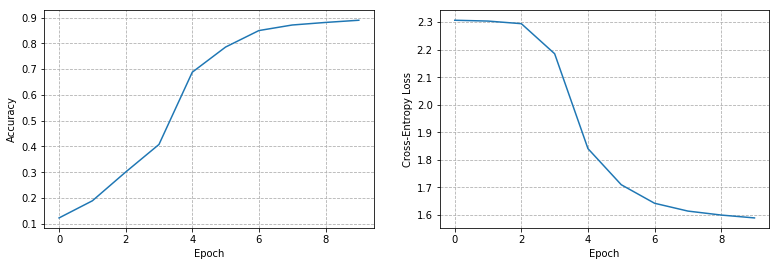

In [96]:
#Visualize accuracy/loss per epoch

import matplotlib.pyplot as plt
f = plt.figure(figsize=(13,4))
ax1 = f.add_subplot(121)
ax1.plot(list_acc,label='train')
ax1.grid( linestyle='--')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax2 = f.add_subplot(122)
ax2.plot(list_loss,label='train')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Cross-Entropy Loss')
ax2.grid( linestyle='--')
plt.show()

In [0]:
#test
net.eval()
test_list_loss=[]
test_liss_acc=[]
confusion_matrix=np.zeros((10,10))
running_loss=0
running_accuracy=0
predicted_label=[]
softmax_cal=np.zeros((len(test_loader),10))
with torch.no_grad():
  for i,(data,labels) in enumerate(test_loader):
      y_pred=net(data)
      test_loss=criterion(y_pred,labels)
      confusion_matrix[labels,torch.max(y_pred.data,1)[1]]+=1
      predicted_label.append(torch.max(y_pred.data,1)[1])
      softmax_cal[i,:]=y_pred.data
      running_loss+=test_loss.item()
      running_accuracy+=accuracy(y_pred,labels)
  running_loss/=i
  running_accuracy/=i
  test_list_loss.append(running_loss)
  test_liss_acc.append(running_accuracy)
  

In [98]:
softmax_cal[0,:]

array([1.02903856e-14, 9.99998927e-01, 2.87253528e-07, 3.97977288e-07,
       2.03052974e-11, 6.59826027e-10, 2.68331513e-09, 5.98283947e-08,
       3.39054367e-07, 6.65054767e-09])

**Accuracy / Precision / Recall**

In [99]:
 print('accuracy : %0.3f'%(running_accuracy))

accuracy : 0.920


**Precision, recall, and F1 scores on each category (digit)**

In [107]:
from collections import defaultdict
import pandas as pd

all_score=defaultdict(dict)
for i in range(len(confusion_matrix)):
  all_score[i]={'recall':confusion_matrix[i,i]/np.sum(confusion_matrix[:,i]),
                'precision':confusion_matrix[i,i]/np.sum(confusion_matrix[i,:]),
                'acc':confusion_matrix[i,i]/(np.sum(confusion_matrix[:,i])+np.sum(confusion_matrix[i,:])-confusion_matrix[i,i]),
                'F1':2*confusion_matrix[i,i]/np.sum(confusion_matrix[i,:])*confusion_matrix[i,i]/np.sum(confusion_matrix[:,i])/(confusion_matrix[i,i]/np.sum(confusion_matrix[i,:])+confusion_matrix[i,i]/np.sum(confusion_matrix[:,i]))}
print('Macro score by digit')
print(pd.DataFrame.from_dict(all_score, orient='index'))

Macro score by digit
     recall  precision       acc        F1
0  0.930300   0.980612  0.913498  0.954794
1  0.972052   0.980617  0.953728  0.976316
2  0.911647   0.879845  0.810714  0.895464
3  0.908726   0.897030  0.822888  0.902840
4  0.911155   0.939919  0.861007  0.925313
5  0.897983   0.848655  0.774029  0.872622
6  0.924720   0.948852  0.880814  0.936631
7  0.922330   0.924125  0.857401  0.923226
8  0.875374   0.901437  0.798908  0.888214
9  0.933124   0.885035  0.832246  0.908444


**Macro-averaged precision, recall, and F1 scores (i.e., the averages of the above measures for all categories)**

In [110]:
test=pd.DataFrame.from_dict(all_score, orient='index')
test.mean()

recall       0.918741
precision    0.918613
acc          0.850523
F1           0.918386
dtype: float64

**2. Confusion matrix**

Show a confusion matrix of the predictions of the model on the test set. 

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


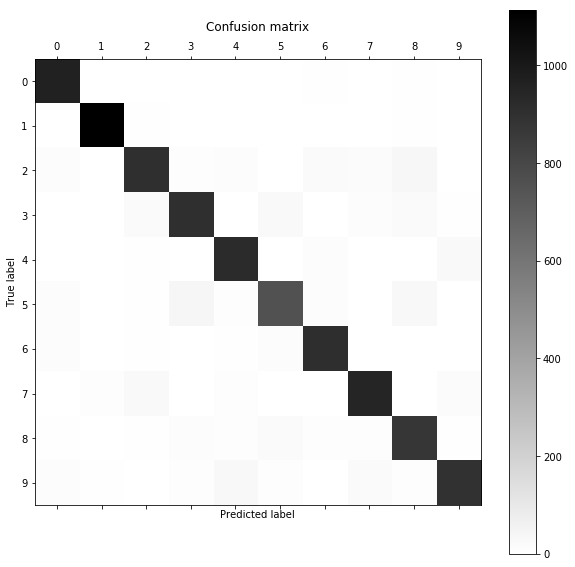

In [101]:
labels=''.join(list(map(str,list(np.arange(0,10)))))

fig = plt.figure(figsize=(10,10))
plt.title('Confusion matrix')
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_matrix,cmap=plt.cm.gray_r)
fig.colorbar(cax)
plt.xticks(np.arange(10),labels)
plt.yticks(np.arange(10),labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [102]:
import pandas as pd
print(pd.DataFrame(confusion_matrix))

       0       1      2      3      4      5      6      7      8      9
0  961.0     0.0    1.0    2.0    0.0    4.0    6.0    1.0    5.0    0.0
1    0.0  1113.0    5.0    4.0    0.0    0.0    3.0    2.0    8.0    0.0
2   14.0     2.0  908.0   13.0   17.0    1.0   22.0   18.0   36.0    1.0
3    3.0     1.0   23.0  906.0    1.0   29.0    2.0   16.0   24.0    5.0
4    1.0     2.0    6.0    0.0  923.0    0.0   15.0    2.0    4.0   29.0
5   15.0     3.0    7.0   41.0   13.0  757.0   16.0    4.0   32.0    4.0
6   14.0     3.0    5.0    2.0    6.0   16.0  909.0    1.0    2.0    0.0
7    4.0    11.0   30.0    1.0   10.0    0.0    0.0  950.0    4.0   18.0
8    7.0     4.0    8.0   17.0    9.0   25.0    9.0   10.0  878.0    7.0
9   14.0     6.0    3.0   11.0   34.0   11.0    1.0   26.0   10.0  893.0


**3. Top-3 easy and confusing examples**

Show the top three easy and three confusing, respectively, images where the model recognized their digits with strong confidences. More specifically, let $y_n$ and $\hat{y}_n$ the true and predicted, respectively, digits of the image $x_n$. We want to find three images with high $P(\hat{y}_n | x_n)$ when $y_n = \hat{y}_n$ (easy examples) $y_n \neq \hat{y}_n$ (confusing examples).

Please show $y_n$, $P(y_n | x_n)$, $\hat{y}_n$, and $P(\hat{y}_n | x_n)$


Construct list for finding highest $P(\hat{y}_n | x_n)$

In [0]:
top_easy=list(np.amax(softmax_cal,axis=1))
predicted=list(np.argmax(softmax_cal,axis=1))
true_label=[[int(example_label),example_data] for batch_id,(example_data,example_label) in enumerate(test_loader)]

In [104]:
combine=[[i,j,z,p[z],data] for i,j,[z,data],p in zip(top_easy,predicted,true_label,softmax_cal)]
sorted(combine,key=lambda x: x[0],reverse=True)
print('.')

.




1.   Top three easy



true label: 1 (0.999998927116394)
predicted label: 1 (0.999998927116394) 


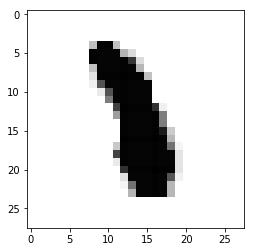

true label: 7 (0.9999172687530518)
predicted label: 7 (0.9999172687530518) 


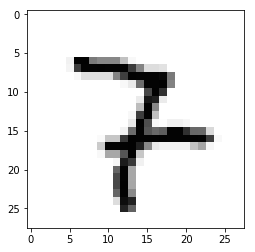

true label: 8 (0.9858689308166504)
predicted label: 8 (0.9858689308166504) 


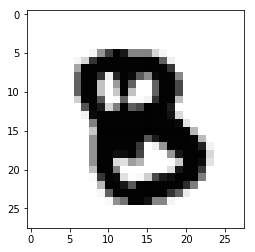

In [105]:
i=0
for score,pred,true,score_true,data in combine:
    if i>2:
      break
    elif pred==true:
        print('true label: {} ({})'.format(true,score_true))
        print('predicted label: {} ({}) '.format(pred,score))
        image=(data[0,0,:,:].numpy())
        plt.imshow(image,cmap='Greys')
        plt.show()
        i+=1

2. Top three confusing

true label: 7 (2.4732236852287315e-05)
predicted label: 1 (0.9999301433563232) 


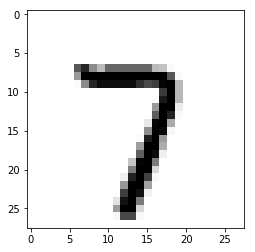

true label: 1 (3.292756900918903e-06)
predicted label: 6 (0.9014251828193665) 


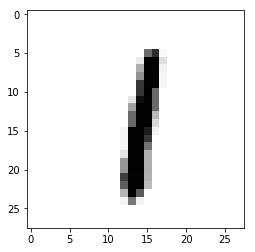

true label: 4 (4.1194892583132445e-15)
predicted label: 0 (0.9998317956924438) 


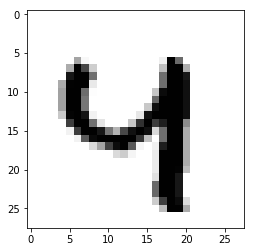

In [106]:
i=0
for score,pred,true,score_true,data in combine:
    if i>2:
      break
    elif pred!=true:
        print('true label: {} ({})'.format(true,score_true))
        print('predicted label: {} ({}) '.format(pred,score))
        image=(data[0,0,:,:].numpy())
        plt.imshow(image,cmap='Greys')
        plt.show()
        i+=1